<a href="https://colab.research.google.com/github/ksathperera/MLOM/blob/main/Lab04_CNN2D_Dogs%26Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
train_path='/content/drive/My Drive/Cat&Dog Dataset/Training_data'
test_path='/content/drive/My Drive/Cat&Dog Dataset/Testing_data'

In [3]:
import tensorflow as tf
from tensorflow import keras

In [6]:
#define the model
model = tf.keras.models.Sequential([
    #Note the input shape is the desired size of the image 300*300 with 3 bytes color
    #This is the first convolution
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    #The second convolution
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    #The third convolution
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    #The fourth convolution
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    #The fifth convolution
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    #flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    #512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    #only 1 output neuron. It will contain a value from
    tf.keras.layers.Dense(1, activation='sigmoid'),

])

In [9]:
#image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#all train images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1./255)

#flow tarining images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

#all test images will be rescaled by 1./255
test_datagen = ImageDataGenerator(rescale = 1./255)

#apply predefined specification to test dataset
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (300, 300),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 633 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [10]:
#complie the model
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer=optimizer,
loss='binary_crossentropy',
metrics=['accuracy'])

In [14]:
#to get sumamry of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 149, 149, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 147, 147, 16)      2320      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 73, 73, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 35, 35, 32)       

In [13]:
#fit the model to train the model
history = model.fit(
    train_generator,
    steps_per_epoch=20,  #no of batch per epochs #633 images / 32 (badge number) = 19.6
    epochs=5,
    validation_data=test_set,
    validation_steps=7  #no of batch size per validation #test 200/32 = 7
)

Epoch 1/5
20/20 [==============================] - 98s 5s/step - loss: 0.6626 - accuracy: 0.6066 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 2/5
20/20 [==============================] - 61s 3s/step - loss: 0.6560 - accuracy: 0.6066 - val_loss: 0.7022 - val_accuracy: 0.5000
Epoch 3/5
20/20 [==============================] - 54s 3s/step - loss: 0.6333 - accuracy: 0.6114 - val_loss: 0.6992 - val_accuracy: 0.5100
Epoch 4/5
20/20 [==============================] - 55s 3s/step - loss: 0.6109 - accuracy: 0.6619 - val_loss: 0.6801 - val_accuracy: 0.5500
Epoch 5/5
20/20 [==============================] - 56s 3s/step - loss: 0.5696 - accuracy: 0.7188 - val_loss: 0.6812 - val_accuracy: 0.5950


In [15]:
#to save weights
model.save_weights('first_try.h5')

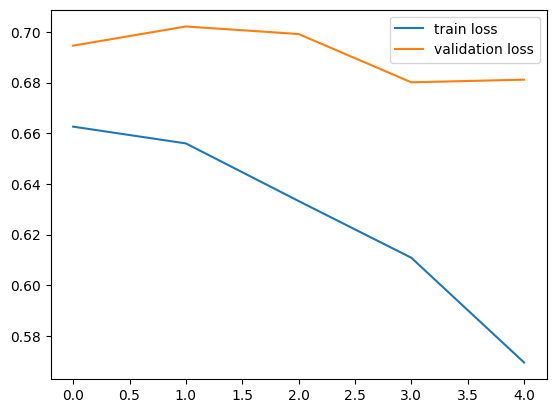

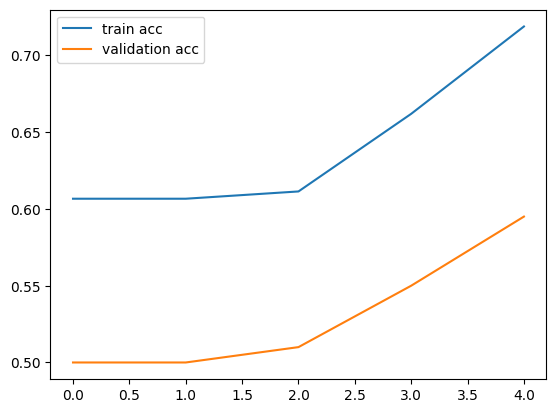

<Figure size 640x480 with 0 Axes>

In [16]:
#plot variation in loss and accuracy
import matplotlib.pyplot as plt
#plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='validation acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')